In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D,Conv2D
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
import tensorflow
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _n

In [10]:
df= pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STEST/S_1__I_582865.csv",parse_dates=['date'],index_col='date')

#convert date field from string to datetime
#df['date'] = pd.to_datetime(df['date'])

In [11]:
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)

In [12]:
df_1=df[0:300]
df_1=df_1.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [61]:
timestep =int(len(df_1) * 0.08)
print(timestep)
X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])

print(np.shape(np.array(X)))
X=np.asanyarray(X)
Y=np.asanyarray(Y)


24
(276, 24, 1)


In [67]:
k = int(len(X) * 0.8)
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [69]:
X_train_series_sub = Xtrain.reshape((Xtrain.shape[0],3, 8,1))

In [66]:
X_train_series_sub.shape

(220, 3, 8, 1)

In [24]:
Xtrain.shape

(220, 24, 1)

In [30]:
from keras.layers import LSTM

In [70]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
#model_cnn_lstm.add(LSTM(10, stateful=True))
model_cnn_lstm.add(Dense(1))


In [72]:
model_cnn_lstm.compile(loss='mse', optimizer='adam')
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Ytrain, epochs=60, verbose=2)

Epoch 1/60
 - 1s - loss: 0.1322
Epoch 2/60
 - 0s - loss: 0.1168
Epoch 3/60
 - 0s - loss: 0.1169
Epoch 4/60
 - 0s - loss: 0.1163
Epoch 5/60
 - 0s - loss: 0.1152
Epoch 6/60
 - 0s - loss: 0.1145
Epoch 7/60
 - 0s - loss: 0.1138
Epoch 8/60
 - 0s - loss: 0.1132
Epoch 9/60
 - 0s - loss: 0.1129
Epoch 10/60
 - 0s - loss: 0.1121
Epoch 11/60
 - 0s - loss: 0.1120
Epoch 12/60
 - 0s - loss: 0.1123
Epoch 13/60
 - 0s - loss: 0.1109
Epoch 14/60
 - 0s - loss: 0.1106
Epoch 15/60
 - 0s - loss: 0.1098
Epoch 16/60
 - 0s - loss: 0.1104
Epoch 17/60
 - 0s - loss: 0.1106
Epoch 18/60
 - 0s - loss: 0.1102
Epoch 19/60
 - 0s - loss: 0.1071
Epoch 20/60
 - 0s - loss: 0.1068
Epoch 21/60
 - 0s - loss: 0.1056
Epoch 22/60
 - 0s - loss: 0.1044
Epoch 23/60
 - 0s - loss: 0.1043
Epoch 24/60
 - 0s - loss: 0.1026
Epoch 25/60
 - 0s - loss: 0.1022
Epoch 26/60
 - 0s - loss: 0.1023
Epoch 27/60
 - 0s - loss: 0.1001
Epoch 28/60
 - 0s - loss: 0.0995
Epoch 29/60
 - 0s - loss: 0.0981
Epoch 30/60
 - 0s - loss: 0.0975
Epoch 31/60
 - 0s -

In [97]:
Xtest = X[k:,:,:]  
Ytest= Y[k:] 
Xtest.shape

(56, 24, 1)

In [74]:
X_test= Xtest.reshape((Xtest.shape[0],3, 8,1))

In [126]:
cnn_lstm_valid_pred = model_cnn_lstm.predict(X_test)

In [127]:
cnn_lstm_valid_pred.reshape(1,-1)

array([[-0.31101573, -0.1751251 ,  0.14378606,  0.09871858,  0.57405317,
        -0.7270322 ,  0.25595528, -0.1325052 , -0.5156639 , -0.1471221 ,
         0.18733947,  0.01967371, -0.6016128 ,  0.08548586,  0.11148778,
         0.23865083, -0.3449318 , -0.4847641 ,  0.08337472, -0.07285985,
         0.08212877, -0.1543484 , -0.28933266, -0.40907705, -0.2789373 ,
         0.10605446, -0.4135773 , -0.42359388, -0.27993903, -0.21050099,
        -0.16584808, -0.31479555, -0.22003081, -0.3706582 , -0.11718416,
         0.267429  , -0.24327058, -0.6402341 ,  0.04818559,  0.07098148,
        -0.36389983, -0.01131521, -0.10461445, -0.40461653, -0.01317942,
         0.26583546, -0.2667566 , -0.7164925 , -0.02905524,  0.22400074,
        -0.3431908 , -0.06104114,  0.22024988, -0.04683503, -0.09120842,
         0.16295192]], dtype=float32)

In [123]:
preds = scaler.inverse_transform(cnn_lstm_valid_pred)

In [124]:
preds

array([[10.582623 , 12.4679   , 16.892315 , 16.26707  , 22.861626 ,
         4.8110185, 18.448496 , 13.059189 ,  7.743436 , 12.8564005,
        17.496552 , 15.170442 ,  6.551024 , 16.083487 , 16.444223 ,
        18.20842  , 10.112087 ,  8.172125 , 16.0542   , 13.886678 ,
        16.036913 , 12.756146 , 10.883443 ,  9.222169 , 11.027662 ,
        16.368845 ,  9.159734 ,  9.020769 , 11.013764 , 11.977114 ,
        12.596605 , 10.530183 , 11.844902 ,  9.755173 , 13.271745 ,
        18.607676 , 11.522485 ,  6.015211 , 15.566002 , 15.88226  ,
         9.848935 , 14.740517 , 13.446131 ,  9.284052 , 14.714654 ,
        18.585566 , 11.196651 ,  4.957241 , 14.494401 , 18.005173 ,
        10.136242 , 14.050645 , 17.953136 , 14.247733 , 13.632119 ,
        17.158213 ]], dtype=float32)

In [80]:
Ytest=Ytest.reshape(1,-1)

In [105]:
true=scaler.inverse_transform(Ytest)

In [88]:
np.sqrt(mean_squared_error(true,preds))

5.940348

In [118]:
true=true.reshape(-1)

In [119]:
len(true)

56

In [125]:
preds.shape

(1, 56)

In [94]:
len(preds)

56

In [120]:
compare=pd.DataFrame()
compare['true']=np.array(true)
compare['pred']=np.array(preds)

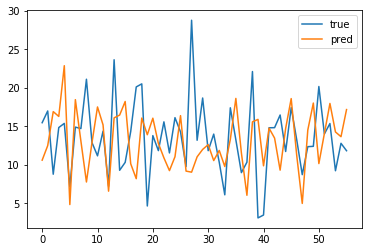

In [121]:
compare.plot()

In [128]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [141]:
import os
import logging, sys
logging.disable(sys.maxsize)
from math import sqrt
paths_to_folders = ['C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Wallmart_Splitted_Train_Data/S__3']
x=0
error = pd.DataFrame(columns=['File_name','RMSE_ERROR_CNN+LSTM','MSE_CNN+LSTM','MAPE_CNN+LSTM'])
for folder in paths_to_folders:
   for csv_file in os.listdir(folder):
        df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Wallmart_Splitted_Train_Data/S__3/"+csv_file,parse_dates=['Date'],index_col='Date')
        if len(df.index)>=140:
            df=df.drop(columns=['Store','Dept','IsHoliday'])
            scaler = MinMaxScaler(feature_range=(-1,1))
            ts = scaler.fit_transform(df)
            timestep =24
            X= []
            Y=[]
            raw_data=ts
            for i in range(len(raw_data)- (timestep)):
                X.append(raw_data[i:i+timestep])
                Y.append(raw_data[i+timestep])

            X=np.asanyarray(X)
            Y=np.asanyarray(Y)
            k = int(len(X) * 0.8)
            Xtrain = X[:k,:,:]  
            Ytrain = Y[:k]    
            X_train_series_sub = Xtrain.reshape((Xtrain.shape[0],3, 8,1))
            model_cnn_lstm = Sequential()
            model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
            model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
            model_cnn_lstm.add(TimeDistributed(Flatten()))
            model_cnn_lstm.add(LSTM(50, activation='relu'))
            #model_cnn_lstm.add(LSTM(10, stateful=True))
            model_cnn_lstm.add(Dense(1))
            model_cnn_lstm.compile(loss='mse', optimizer='adam')
            cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Ytrain, epochs=60, verbose=2) 
            Xtest = X[k:,:,:]  
            Ytest= Y[k:] 
            X_test= Xtest.reshape((Xtest.shape[0],3, 8,1))
            cnn_lstm_valid_pred = model_cnn_lstm.predict(X_test)
            preds = scaler.inverse_transform(cnn_lstm_valid_pred)
            true=scaler.inverse_transform(Ytest)
            rmse =  np.sqrt(mean_squared_error(true, preds))  
            error.loc[x, ['File_name']]=csv_file
            error.loc[x, ['RMSE_ERROR_CNN+LSTM']]=rmse
            error.loc[x, ['MSE_CNN+LSTM']]=mean_squared_error(true, preds)
            error.loc[x, ['MAPE_CNN+LSTM']]=mean_absolute_percentage_error(true, preds)
            x=x+1
            print(x)

Epoch 1/60
 - 16s - loss: 0.3385
Epoch 2/60
 - 1s - loss: 0.2279
Epoch 3/60
 - 0s - loss: 0.1748
Epoch 4/60
 - 0s - loss: 0.1615
Epoch 5/60
 - 0s - loss: 0.1776
Epoch 6/60
 - 0s - loss: 0.1724
Epoch 7/60
 - 0s - loss: 0.1580
Epoch 8/60
 - 0s - loss: 0.1516
Epoch 9/60
 - 0s - loss: 0.1524
Epoch 10/60
 - 0s - loss: 0.1521
Epoch 11/60
 - 0s - loss: 0.1494
Epoch 12/60
 - 0s - loss: 0.1449
Epoch 13/60
 - 0s - loss: 0.1421
Epoch 14/60
 - 0s - loss: 0.1405
Epoch 15/60
 - 0s - loss: 0.1390
Epoch 16/60
 - 0s - loss: 0.1372
Epoch 17/60
 - 0s - loss: 0.1353
Epoch 18/60
 - 0s - loss: 0.1339
Epoch 19/60
 - 0s - loss: 0.1319
Epoch 20/60
 - 0s - loss: 0.1305
Epoch 21/60
 - 0s - loss: 0.1294
Epoch 22/60
 - 0s - loss: 0.1277
Epoch 23/60
 - 0s - loss: 0.1257
Epoch 24/60
 - 0s - loss: 0.1240
Epoch 25/60
 - 0s - loss: 0.1219
Epoch 26/60
 - 0s - loss: 0.1203
Epoch 27/60
 - 0s - loss: 0.1180
Epoch 28/60
 - 0s - loss: 0.1160
Epoch 29/60
 - 1s - loss: 0.1132
Epoch 30/60
 - 0s - loss: 0.1111
Epoch 31/60
 - 0s 

 - 0s - loss: 0.1307
Epoch 11/60
 - 0s - loss: 0.1282
Epoch 12/60
 - 1s - loss: 0.1266
Epoch 13/60
 - 0s - loss: 0.1249
Epoch 14/60
 - 0s - loss: 0.1238
Epoch 15/60
 - 0s - loss: 0.1218
Epoch 16/60
 - 0s - loss: 0.1205
Epoch 17/60
 - 0s - loss: 0.1194
Epoch 18/60
 - 0s - loss: 0.1184
Epoch 19/60
 - 1s - loss: 0.1173
Epoch 20/60
 - 0s - loss: 0.1169
Epoch 21/60
 - 0s - loss: 0.1153
Epoch 22/60
 - 1s - loss: 0.1141
Epoch 23/60
 - 1s - loss: 0.1132
Epoch 24/60
 - 1s - loss: 0.1117
Epoch 25/60
 - 1s - loss: 0.1117
Epoch 26/60
 - 1s - loss: 0.1097
Epoch 27/60
 - 1s - loss: 0.1080
Epoch 28/60
 - 1s - loss: 0.1074
Epoch 29/60
 - 1s - loss: 0.1058
Epoch 30/60
 - 1s - loss: 0.1050
Epoch 31/60
 - 1s - loss: 0.1045
Epoch 32/60
 - 1s - loss: 0.1019
Epoch 33/60
 - 1s - loss: 0.1006
Epoch 34/60
 - 1s - loss: 0.0996
Epoch 35/60
 - 1s - loss: 0.0978
Epoch 36/60
 - 0s - loss: 0.0963
Epoch 37/60
 - 1s - loss: 0.0959
Epoch 38/60
 - 1s - loss: 0.0941
Epoch 39/60
 - 1s - loss: 0.0935
Epoch 40/60
 - 1s - lo

 - 0s - loss: 0.0434
Epoch 20/60
 - 0s - loss: 0.0429
Epoch 21/60
 - 0s - loss: 0.0431
Epoch 22/60
 - 0s - loss: 0.0431
Epoch 23/60
 - 0s - loss: 0.0426
Epoch 24/60
 - 0s - loss: 0.0425
Epoch 25/60
 - 0s - loss: 0.0429
Epoch 26/60
 - 0s - loss: 0.0425
Epoch 27/60
 - 0s - loss: 0.0423
Epoch 28/60
 - 0s - loss: 0.0423
Epoch 29/60
 - 1s - loss: 0.0422
Epoch 30/60
 - 0s - loss: 0.0420
Epoch 31/60
 - 0s - loss: 0.0420
Epoch 32/60
 - 1s - loss: 0.0418
Epoch 33/60
 - 1s - loss: 0.0417
Epoch 34/60
 - 0s - loss: 0.0416
Epoch 35/60
 - 0s - loss: 0.0415
Epoch 36/60
 - 1s - loss: 0.0413
Epoch 37/60
 - 0s - loss: 0.0412
Epoch 38/60
 - 0s - loss: 0.0412
Epoch 39/60
 - 0s - loss: 0.0410
Epoch 40/60
 - 1s - loss: 0.0409
Epoch 41/60
 - 0s - loss: 0.0408
Epoch 42/60
 - 0s - loss: 0.0406
Epoch 43/60
 - 1s - loss: 0.0405
Epoch 44/60
 - 1s - loss: 0.0405
Epoch 45/60
 - 1s - loss: 0.0404
Epoch 46/60
 - 0s - loss: 0.0401
Epoch 47/60
 - 1s - loss: 0.0400
Epoch 48/60
 - 0s - loss: 0.0401
Epoch 49/60
 - 1s - lo

 - 0s - loss: 0.0780
Epoch 29/60
 - 0s - loss: 0.0776
Epoch 30/60
 - 0s - loss: 0.0773
Epoch 31/60
 - 0s - loss: 0.0769
Epoch 32/60
 - 0s - loss: 0.0766
Epoch 33/60
 - 0s - loss: 0.0763
Epoch 34/60
 - 0s - loss: 0.0761
Epoch 35/60
 - 0s - loss: 0.0762
Epoch 36/60
 - 0s - loss: 0.0755
Epoch 37/60
 - 1s - loss: 0.0755
Epoch 38/60
 - 0s - loss: 0.0750
Epoch 39/60
 - 0s - loss: 0.0750
Epoch 40/60
 - 0s - loss: 0.0749
Epoch 41/60
 - 0s - loss: 0.0745
Epoch 42/60
 - 0s - loss: 0.0740
Epoch 43/60
 - 0s - loss: 0.0738
Epoch 44/60
 - 0s - loss: 0.0735
Epoch 45/60
 - 0s - loss: 0.0732
Epoch 46/60
 - 0s - loss: 0.0731
Epoch 47/60
 - 0s - loss: 0.0731
Epoch 48/60
 - 0s - loss: 0.0725
Epoch 49/60
 - 1s - loss: 0.0725
Epoch 50/60
 - 1s - loss: 0.0721
Epoch 51/60
 - 0s - loss: 0.0718
Epoch 52/60
 - 0s - loss: 0.0717
Epoch 53/60
 - 0s - loss: 0.0716
Epoch 54/60
 - 0s - loss: 0.0711
Epoch 55/60
 - 0s - loss: 0.0708
Epoch 56/60
 - 0s - loss: 0.0706
Epoch 57/60
 - 0s - loss: 0.0704
Epoch 58/60
 - 0s - lo

 - 0s - loss: 0.0531
Epoch 38/60
 - 1s - loss: 0.0522
Epoch 39/60
 - 0s - loss: 0.0519
Epoch 40/60
 - 0s - loss: 0.0513
Epoch 41/60
 - 0s - loss: 0.0505
Epoch 42/60
 - 0s - loss: 0.0508
Epoch 43/60
 - 0s - loss: 0.0505
Epoch 44/60
 - 1s - loss: 0.0489
Epoch 45/60
 - 0s - loss: 0.0486
Epoch 46/60
 - 0s - loss: 0.0487
Epoch 47/60
 - 0s - loss: 0.0481
Epoch 48/60
 - 0s - loss: 0.0483
Epoch 49/60
 - 0s - loss: 0.0474
Epoch 50/60
 - 0s - loss: 0.0474
Epoch 51/60
 - 0s - loss: 0.0467
Epoch 52/60
 - 0s - loss: 0.0466
Epoch 53/60
 - 0s - loss: 0.0468
Epoch 54/60
 - 0s - loss: 0.0461
Epoch 55/60
 - 0s - loss: 0.0465
Epoch 56/60
 - 0s - loss: 0.0466
Epoch 57/60
 - 0s - loss: 0.0455
Epoch 58/60
 - 0s - loss: 0.0451
Epoch 59/60
 - 0s - loss: 0.0455
Epoch 60/60
 - 0s - loss: 0.0451
17
Epoch 1/60
 - 20s - loss: 0.4444
Epoch 2/60
 - 1s - loss: 0.3034
Epoch 3/60
 - 0s - loss: 0.1805
Epoch 4/60
 - 0s - loss: 0.1042
Epoch 5/60
 - 1s - loss: 0.1020
Epoch 6/60
 - 0s - loss: 0.1177
Epoch 7/60
 - 0s - loss:

 - 0s - loss: 0.0455
Epoch 47/60
 - 0s - loss: 0.0447
Epoch 48/60
 - 0s - loss: 0.0436
Epoch 49/60
 - 0s - loss: 0.0431
Epoch 50/60
 - 0s - loss: 0.0420
Epoch 51/60
 - 0s - loss: 0.0416
Epoch 52/60
 - 0s - loss: 0.0405
Epoch 53/60
 - 0s - loss: 0.0394
Epoch 54/60
 - 1s - loss: 0.0401
Epoch 55/60
 - 0s - loss: 0.0387
Epoch 56/60
 - 0s - loss: 0.0373
Epoch 57/60
 - 0s - loss: 0.0376
Epoch 58/60
 - 0s - loss: 0.0362
Epoch 59/60
 - 0s - loss: 0.0378
Epoch 60/60
 - 0s - loss: 0.0354
21
Epoch 1/60
 - 21s - loss: 0.2058
Epoch 2/60
 - 0s - loss: 0.1631
Epoch 3/60
 - 0s - loss: 0.1318
Epoch 4/60
 - 0s - loss: 0.1178
Epoch 5/60
 - 0s - loss: 0.1169
Epoch 6/60
 - 1s - loss: 0.1130
Epoch 7/60
 - 0s - loss: 0.1050
Epoch 8/60
 - 0s - loss: 0.0982
Epoch 9/60
 - 0s - loss: 0.0949
Epoch 10/60
 - 0s - loss: 0.0904
Epoch 11/60
 - 0s - loss: 0.0855
Epoch 12/60
 - 0s - loss: 0.0806
Epoch 13/60
 - 0s - loss: 0.0755
Epoch 14/60
 - 0s - loss: 0.0715
Epoch 15/60
 - 0s - loss: 0.0666
Epoch 16/60
 - 0s - loss: 0

 - 0s - loss: 0.1014
Epoch 56/60
 - 0s - loss: 0.0997
Epoch 57/60
 - 0s - loss: 0.0987
Epoch 58/60
 - 0s - loss: 0.0971
Epoch 59/60
 - 1s - loss: 0.0961
Epoch 60/60
 - 0s - loss: 0.0951
25
Epoch 1/60
 - 22s - loss: 0.2866
Epoch 2/60
 - 0s - loss: 0.2345
Epoch 3/60
 - 0s - loss: 0.2107
Epoch 4/60
 - 0s - loss: 0.2005
Epoch 5/60
 - 1s - loss: 0.1944
Epoch 6/60
 - 0s - loss: 0.1860
Epoch 7/60
 - 1s - loss: 0.1777
Epoch 8/60
 - 1s - loss: 0.1706
Epoch 9/60
 - 0s - loss: 0.1658
Epoch 10/60
 - 0s - loss: 0.1616
Epoch 11/60
 - 0s - loss: 0.1559
Epoch 12/60
 - 0s - loss: 0.1514
Epoch 13/60
 - 1s - loss: 0.1469
Epoch 14/60
 - 0s - loss: 0.1458
Epoch 15/60
 - 1s - loss: 0.1406
Epoch 16/60
 - 0s - loss: 0.1370
Epoch 17/60
 - 0s - loss: 0.1339
Epoch 18/60
 - 0s - loss: 0.1315
Epoch 19/60
 - 0s - loss: 0.1277
Epoch 20/60
 - 0s - loss: 0.1254
Epoch 21/60
 - 0s - loss: 0.1229
Epoch 22/60
 - 0s - loss: 0.1204
Epoch 23/60
 - 1s - loss: 0.1172
Epoch 24/60
 - 1s - loss: 0.1164
Epoch 25/60
 - 1s - loss: 0

 - 0s - loss: 0.1488
Epoch 5/60
 - 1s - loss: 0.1459
Epoch 6/60
 - 0s - loss: 0.1451
Epoch 7/60
 - 0s - loss: 0.1429
Epoch 8/60
 - 1s - loss: 0.1413
Epoch 9/60
 - 1s - loss: 0.1400
Epoch 10/60
 - 1s - loss: 0.1393
Epoch 11/60
 - 1s - loss: 0.1373
Epoch 12/60
 - 0s - loss: 0.1376
Epoch 13/60
 - 1s - loss: 0.1346
Epoch 14/60
 - 1s - loss: 0.1331
Epoch 15/60
 - 0s - loss: 0.1327
Epoch 16/60
 - 0s - loss: 0.1315
Epoch 17/60
 - 0s - loss: 0.1297
Epoch 18/60
 - 0s - loss: 0.1293
Epoch 19/60
 - 0s - loss: 0.1274
Epoch 20/60
 - 0s - loss: 0.1262
Epoch 21/60
 - 0s - loss: 0.1243
Epoch 22/60
 - 1s - loss: 0.1228
Epoch 23/60
 - 1s - loss: 0.1214
Epoch 24/60
 - 0s - loss: 0.1192
Epoch 25/60
 - 1s - loss: 0.1187
Epoch 26/60
 - 0s - loss: 0.1160
Epoch 27/60
 - 1s - loss: 0.1161
Epoch 28/60
 - 1s - loss: 0.1134
Epoch 29/60
 - 0s - loss: 0.1117
Epoch 30/60
 - 1s - loss: 0.1083
Epoch 31/60
 - 1s - loss: 0.1067
Epoch 32/60
 - 1s - loss: 0.1046
Epoch 33/60
 - 0s - loss: 0.1028
Epoch 34/60
 - 0s - loss: 0

Epoch 14/60
 - 0s - loss: 0.0968
Epoch 15/60
 - 0s - loss: 0.0947
Epoch 16/60
 - 0s - loss: 0.0932
Epoch 17/60
 - 0s - loss: 0.0918
Epoch 18/60
 - 0s - loss: 0.0904
Epoch 19/60
 - 0s - loss: 0.0890
Epoch 20/60
 - 1s - loss: 0.0874
Epoch 21/60
 - 0s - loss: 0.0851
Epoch 22/60
 - 1s - loss: 0.0839
Epoch 23/60
 - 0s - loss: 0.0830
Epoch 24/60
 - 0s - loss: 0.0816
Epoch 25/60
 - 0s - loss: 0.0795
Epoch 26/60
 - 0s - loss: 0.0782
Epoch 27/60
 - 0s - loss: 0.0777
Epoch 28/60
 - 0s - loss: 0.0762
Epoch 29/60
 - 0s - loss: 0.0743
Epoch 30/60
 - 0s - loss: 0.0730
Epoch 31/60
 - 0s - loss: 0.0723
Epoch 32/60
 - 0s - loss: 0.0711
Epoch 33/60
 - 0s - loss: 0.0692
Epoch 34/60
 - 0s - loss: 0.0693
Epoch 35/60
 - 1s - loss: 0.0669
Epoch 36/60
 - 1s - loss: 0.0656
Epoch 37/60
 - 0s - loss: 0.0633
Epoch 38/60
 - 0s - loss: 0.0629
Epoch 39/60
 - 1s - loss: 0.0614
Epoch 40/60
 - 0s - loss: 0.0587
Epoch 41/60
 - 0s - loss: 0.0589
Epoch 42/60
 - 1s - loss: 0.0558
Epoch 43/60
 - 1s - loss: 0.0539
Epoch 44/6

Epoch 23/60
 - 1s - loss: 0.0872
Epoch 24/60
 - 1s - loss: 0.0859
Epoch 25/60
 - 0s - loss: 0.0846
Epoch 26/60
 - 0s - loss: 0.0839
Epoch 27/60
 - 0s - loss: 0.0830
Epoch 28/60
 - 0s - loss: 0.0818
Epoch 29/60
 - 0s - loss: 0.0806
Epoch 30/60
 - 0s - loss: 0.0795
Epoch 31/60
 - 1s - loss: 0.0791
Epoch 32/60
 - 1s - loss: 0.0773
Epoch 33/60
 - 1s - loss: 0.0764
Epoch 34/60
 - 0s - loss: 0.0753
Epoch 35/60
 - 1s - loss: 0.0746
Epoch 36/60
 - 0s - loss: 0.0736
Epoch 37/60
 - 1s - loss: 0.0736
Epoch 38/60
 - 1s - loss: 0.0719
Epoch 39/60
 - 1s - loss: 0.0715
Epoch 40/60
 - 1s - loss: 0.0705
Epoch 41/60
 - 0s - loss: 0.0696
Epoch 42/60
 - 1s - loss: 0.0699
Epoch 43/60
 - 1s - loss: 0.0686
Epoch 44/60
 - 0s - loss: 0.0678
Epoch 45/60
 - 1s - loss: 0.0670
Epoch 46/60
 - 0s - loss: 0.0658
Epoch 47/60
 - 1s - loss: 0.0655
Epoch 48/60
 - 1s - loss: 0.0646
Epoch 49/60
 - 1s - loss: 0.0638
Epoch 50/60
 - 1s - loss: 0.0632
Epoch 51/60
 - 1s - loss: 0.0624
Epoch 52/60
 - 1s - loss: 0.0617
Epoch 53/6

Epoch 32/60
 - 1s - loss: 0.1354
Epoch 33/60
 - 1s - loss: 0.1339
Epoch 34/60
 - 1s - loss: 0.1328
Epoch 35/60
 - 1s - loss: 0.1301
Epoch 36/60
 - 1s - loss: 0.1276
Epoch 37/60
 - 1s - loss: 0.1255
Epoch 38/60
 - 0s - loss: 0.1238
Epoch 39/60
 - 0s - loss: 0.1217
Epoch 40/60
 - 0s - loss: 0.1200
Epoch 41/60
 - 1s - loss: 0.1168
Epoch 42/60
 - 0s - loss: 0.1146
Epoch 43/60
 - 0s - loss: 0.1114
Epoch 44/60
 - 1s - loss: 0.1089
Epoch 45/60
 - 1s - loss: 0.1063
Epoch 46/60
 - 0s - loss: 0.1039
Epoch 47/60
 - 0s - loss: 0.1005
Epoch 48/60
 - 1s - loss: 0.0975
Epoch 49/60
 - 1s - loss: 0.0945
Epoch 50/60
 - 1s - loss: 0.0916
Epoch 51/60
 - 0s - loss: 0.0888
Epoch 52/60
 - 1s - loss: 0.0851
Epoch 53/60
 - 0s - loss: 0.0833
Epoch 54/60
 - 1s - loss: 0.0805
Epoch 55/60
 - 1s - loss: 0.0781
Epoch 56/60
 - 1s - loss: 0.0740
Epoch 57/60
 - 0s - loss: 0.0731
Epoch 58/60
 - 0s - loss: 0.0715
Epoch 59/60
 - 0s - loss: 0.0665
Epoch 60/60
 - 0s - loss: 0.0653
42
Epoch 1/60
 - 29s - loss: 0.7080
Epoch 2

Epoch 41/60
 - 0s - loss: 0.0790
Epoch 42/60
 - 1s - loss: 0.0791
Epoch 43/60
 - 0s - loss: 0.0789
Epoch 44/60
 - 1s - loss: 0.0788
Epoch 45/60
 - 1s - loss: 0.0788
Epoch 46/60
 - 1s - loss: 0.0790
Epoch 47/60
 - 0s - loss: 0.0787
Epoch 48/60
 - 1s - loss: 0.0789
Epoch 49/60
 - 0s - loss: 0.0787
Epoch 50/60
 - 1s - loss: 0.0785
Epoch 51/60
 - 0s - loss: 0.0784
Epoch 52/60
 - 0s - loss: 0.0784
Epoch 53/60
 - 0s - loss: 0.0783
Epoch 54/60
 - 1s - loss: 0.0785
Epoch 55/60
 - 0s - loss: 0.0783
Epoch 56/60
 - 1s - loss: 0.0781
Epoch 57/60
 - 0s - loss: 0.0781
Epoch 58/60
 - 1s - loss: 0.0783
Epoch 59/60
 - 0s - loss: 0.0780
Epoch 60/60
 - 1s - loss: 0.0780
46
Epoch 1/60
 - 24s - loss: 0.1757
Epoch 2/60
 - 0s - loss: 0.1680
Epoch 3/60
 - 0s - loss: 0.1633
Epoch 4/60
 - 1s - loss: 0.1589
Epoch 5/60
 - 1s - loss: 0.1548
Epoch 6/60
 - 0s - loss: 0.1503
Epoch 7/60
 - 0s - loss: 0.1469
Epoch 8/60
 - 1s - loss: 0.1430
Epoch 9/60
 - 1s - loss: 0.1394
Epoch 10/60
 - 1s - loss: 0.1359
Epoch 11/60
 - 

Epoch 50/60
 - 0s - loss: 0.0647
Epoch 51/60
 - 0s - loss: 0.0637
Epoch 52/60
 - 0s - loss: 0.0633
Epoch 53/60
 - 1s - loss: 0.0623
Epoch 54/60
 - 1s - loss: 0.0616
Epoch 55/60
 - 1s - loss: 0.0608
Epoch 56/60
 - 1s - loss: 0.0600
Epoch 57/60
 - 0s - loss: 0.0598
Epoch 58/60
 - 1s - loss: 0.0585
Epoch 59/60
 - 1s - loss: 0.0577
Epoch 60/60
 - 1s - loss: 0.0571
50
Epoch 1/60
 - 45s - loss: 0.0940
Epoch 2/60
 - 1s - loss: 0.0881
Epoch 3/60
 - 0s - loss: 0.0837
Epoch 4/60
 - 1s - loss: 0.0814
Epoch 5/60
 - 0s - loss: 0.0799
Epoch 6/60
 - 0s - loss: 0.0788
Epoch 7/60
 - 0s - loss: 0.0783
Epoch 8/60
 - 0s - loss: 0.0787
Epoch 9/60
 - 1s - loss: 0.0771
Epoch 10/60
 - 1s - loss: 0.0767
Epoch 11/60
 - 1s - loss: 0.0755
Epoch 12/60
 - 0s - loss: 0.0749
Epoch 13/60
 - 0s - loss: 0.0744
Epoch 14/60
 - 1s - loss: 0.0734
Epoch 15/60
 - 1s - loss: 0.0726
Epoch 16/60
 - 0s - loss: 0.0716
Epoch 17/60
 - 0s - loss: 0.0718
Epoch 18/60
 - 0s - loss: 0.0694
Epoch 19/60
 - 1s - loss: 0.0688
Epoch 20/60
 - 

Epoch 59/60
 - 1s - loss: 0.0299
Epoch 60/60
 - 1s - loss: 0.0303
54
Epoch 1/60
 - 26s - loss: 0.3405
Epoch 2/60
 - 0s - loss: 0.2277
Epoch 3/60
 - 1s - loss: 0.1390
Epoch 4/60
 - 1s - loss: 0.0915
Epoch 5/60
 - 1s - loss: 0.0817
Epoch 6/60
 - 1s - loss: 0.0952
Epoch 7/60
 - 1s - loss: 0.0891
Epoch 8/60
 - 1s - loss: 0.0769
Epoch 9/60
 - 1s - loss: 0.0750
Epoch 10/60
 - 1s - loss: 0.0747
Epoch 11/60
 - 1s - loss: 0.0745
Epoch 12/60
 - 1s - loss: 0.0724
Epoch 13/60
 - 1s - loss: 0.0705
Epoch 14/60
 - 0s - loss: 0.0680
Epoch 15/60
 - 0s - loss: 0.0671
Epoch 16/60
 - 1s - loss: 0.0660
Epoch 17/60
 - 1s - loss: 0.0644
Epoch 18/60
 - 1s - loss: 0.0629
Epoch 19/60
 - 0s - loss: 0.0616
Epoch 20/60
 - 0s - loss: 0.0602
Epoch 21/60
 - 0s - loss: 0.0589
Epoch 22/60
 - 1s - loss: 0.0581
Epoch 23/60
 - 1s - loss: 0.0562
Epoch 24/60
 - 1s - loss: 0.0547
Epoch 25/60
 - 1s - loss: 0.0533
Epoch 26/60
 - 1s - loss: 0.0523
Epoch 27/60
 - 1s - loss: 0.0503
Epoch 28/60
 - 1s - loss: 0.0491
Epoch 29/60
 - 

Epoch 8/60
 - 1s - loss: 0.0812
Epoch 9/60
 - 1s - loss: 0.0789
Epoch 10/60
 - 0s - loss: 0.0776
Epoch 11/60
 - 0s - loss: 0.0754
Epoch 12/60
 - 0s - loss: 0.0732
Epoch 13/60
 - 0s - loss: 0.0715
Epoch 14/60
 - 0s - loss: 0.0702
Epoch 15/60
 - 0s - loss: 0.0685
Epoch 16/60
 - 0s - loss: 0.0670
Epoch 17/60
 - 0s - loss: 0.0654
Epoch 18/60
 - 1s - loss: 0.0645
Epoch 19/60
 - 1s - loss: 0.0645
Epoch 20/60
 - 0s - loss: 0.0622
Epoch 21/60
 - 0s - loss: 0.0612
Epoch 22/60
 - 0s - loss: 0.0612
Epoch 23/60
 - 0s - loss: 0.0602
Epoch 24/60
 - 0s - loss: 0.0595
Epoch 25/60
 - 0s - loss: 0.0594
Epoch 26/60
 - 0s - loss: 0.0588
Epoch 27/60
 - 0s - loss: 0.0590
Epoch 28/60
 - 0s - loss: 0.0577
Epoch 29/60
 - 1s - loss: 0.0576
Epoch 30/60
 - 1s - loss: 0.0569
Epoch 31/60
 - 0s - loss: 0.0569
Epoch 32/60
 - 1s - loss: 0.0568
Epoch 33/60
 - 1s - loss: 0.0558
Epoch 34/60
 - 0s - loss: 0.0548
Epoch 35/60
 - 0s - loss: 0.0543
Epoch 36/60
 - 0s - loss: 0.0542
Epoch 37/60
 - 0s - loss: 0.0536
Epoch 38/60


In [142]:
error

,File_name,RMSE_ERROR_CNN+LSTM,MSE_CNN+LSTM,MAPE_CNN+LSTM
0,S_3__D_1.csv,2948.94,8.69625e+06,31.1983
1,S_3__D_10.csv,1742.83,3.03746e+06,11.6457
2,S_3__D_11.csv,7363.73,5.42245e+07,59.1938
3,S_3__D_12.csv,540.456,292093,16.441
4,S_3__D_13.csv,1650.06,2.72271e+06,11.8997
5,S_3__D_14.csv,849.486,721627,16.4067
6,S_3__D_16.csv,1465.3,2.14709e+06,16.4378
7,S_3__D_17.csv,567.316,321847,18.6259
8,S_3__D_19.csv,258.232,66683.6,33.3535
9,S_3__D_2.csv,1215.27,1.47688e+06,5.02913


In [143]:
error.to_csv('CNN+LSTM STORE 3.csv')